# **Question 5**

In [179]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st 
import math

df = pd.read_csv("weather.dat", header = None)

# 5.c)

In [180]:
#Function to calculate histogram estimates
def calc_hist(interval):
    hist = {}
    for i in range(len(interval) - 1):
        count = 0
        for j in data:
            if j >= interval[i] and j < interval[i+1]:
                count = count + 1
        hist[interval[i]]  = count / n
    
    return hist

In [181]:
# Function to plot the hist estimate
def plot_hist(hist):
    plt.figure(figsize=(15,5))
    plt.bar(range(len(hist)), list(hist.values()), align='center')
    plt.xticks(range(len(hist)), list(hist.keys()))
    plt.title("Histogram Estimate")
    plt.xlabel("x")
    plt.ylabel("h^(x)")
    plt.show()

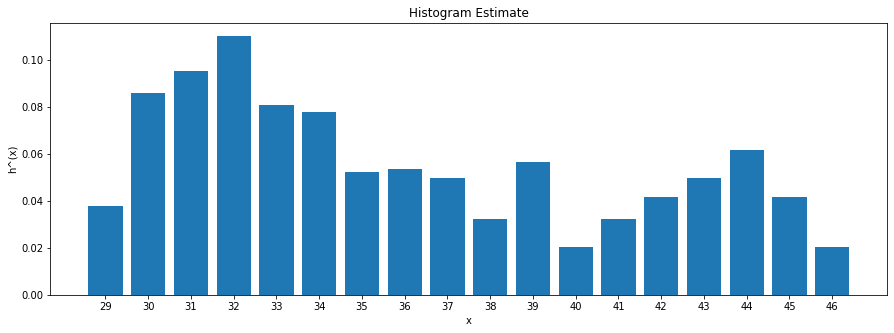

In [182]:
start = math.floor(df.min())
end = math.ceil(df.max())
interval = np.arange(start,end + 1,1)
hist = {} #dict to store hist estimate values

n = df.shape[0] #number of samples
data = df[0].to_numpy() #convert to array
hist = calc_hist(interval)
plot_hist(hist)

# 5.d)

In [183]:
# Function to calculate cdf 
def calc_cdf(x, y):
    x_hist = []
    y_hist = []
    
    # Prepending 0's to make graph start from 0
    x_hist.append(0)
    y_hist.append(0)
    y_curr = 0
    
    for i in range(len(x)):
        y_curr += y[i]
        y_hist.append(y_curr)
        x_hist.append(x[i])
    
    return (x_hist, y_hist)

In [184]:
# Function to plot the figure
def plot_cdf(x, y):
    plt.figure(figsize=(20,8))
    plt.step(x, y, where="post", label="CDF")
    plt.xticks(x, rotation = 90)
    plt.yticks(np.arange(0, 1.1, 0.05))
    plt.title("Empirical CDF")
    plt.xlabel("Sample Points")
    plt.ylabel("Pr[X<x]")
    plt.legend(bbox_to_anchor=(1, 0), loc=4, borderaxespad=0.)
    plt.grid(which="both")
    plt.show()

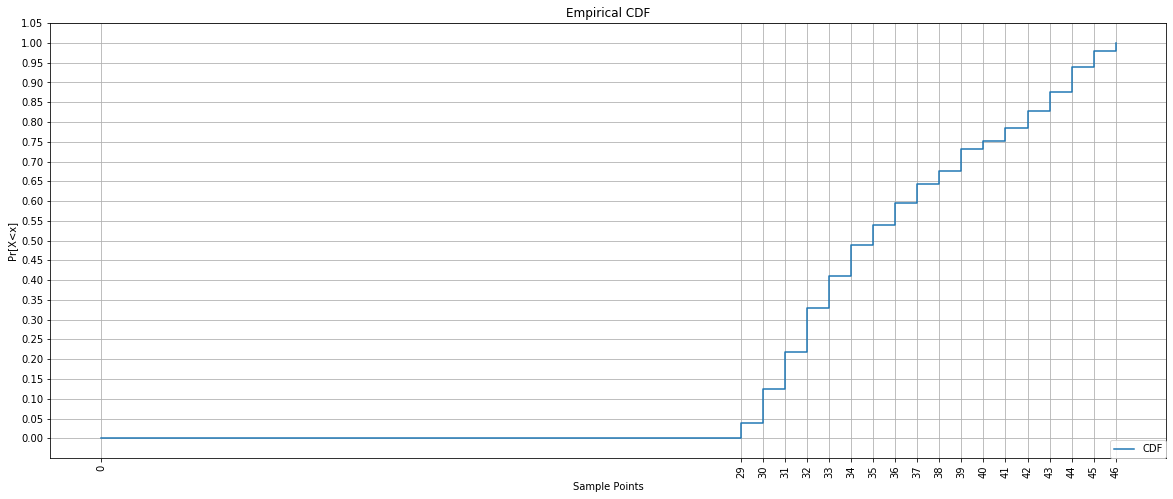

In [185]:
tx, ty = calc_cdf(list(hist.keys()), list(hist.values()))
plot_cdf(tx, ty)